In [2]:
%pip install tensorflow-gpu opencv-python==4.5.5.64 matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import os
from pdf2image import convert_from_path
import cv2
import imghdr

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
Images_folder_path = r'C:\Users\zachc\OneDrive - RAHEEL KHAWAJA\Desktop\AMA Automation\Perscripton\Images'
path = r"C:\Users\zachc\OneDrive - RAHEEL KHAWAJA\Desktop\AMA Automation\Perscripton\pdfs"
poppler_path = r"C:\Program Files\poppler-22.04.0\Library\bin"
simonmed_data = r'C:\Users\zachc\OneDrive - RAHEEL KHAWAJA\Desktop\AMA Automation\Perscripton\simon_med'

In [8]:
os.chdir(r'C:\Users\zachc\OneDrive - RAHEEL KHAWAJA\Desktop\AMA Automation\Perscripton\simon_med')

In [9]:
# if the file in simonmed is a pdf then convert it to jpg

# for file in os.listdir()

#     if file.find('.pdf') != -1:
#         #create a folder with the same name as the pdf
#         os.mkdir(file[:-4])
#         #convert the pdf to jpg
#         images = convert_from_path(file,dpi=300, poppler_path=poppler_path)
#         #save the jpg to the folder
#         for i in range(len(images)):
#             images[i].save(f'{file[:-4]}/{file[:-4]}_{i}.jpg', 'JPEG')
       
        
#     elif file.find('.jpg') != -1:
#         #create a folder with the same name as the jpg
#         os.mkdir(file[:-4])
#         #move the jpg to the folder
#         os.rename(file, file[:-4] + '/' + file[:-4] + '.jpg')

        
                
                
        

In [10]:
#for each folder in simonmed
# for folder in os.listdir():
#     #rename the folder to the index of the folder
#     if folder.find('pdf') != -1:
#         os.rename(folder,   str(os.listdir().index(folder)))

#     #for each file in the folder
#     for file in os.listdir(folder):
#         #if the file is a jpg
#         if file.find('.jpg') != -1:
#             #get the file path
#             file_path = os.path.join(folder, file)
#             #read the image
            
            
        

In [11]:
#rename the jpgs in simonmed to the index of the folder 
#if the name of the file exists in the folder then rename it to the index of the folder + 1

# for file in os.listdir():
#     if file.find('.jpg') != -1:
#         os.rename(file, str(os.listdir().index(file)) + '.jpg')
 



In [12]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from email.mime import image


simonmed_data = r'C:\Users\zachc\OneDrive - RAHEEL KHAWAJA\Desktop\AMA Automation\Perscripton\simon_med'
print (len(simonmed_data))
data = tf.keras.utils.image_dataset_from_directory(simonmed_data, image_size = (500,500)  , crop_to_aspect_ratio=False, color_mode='grayscale', batch_size=5)



85
Found 23 files belonging to 1 classes.


In [15]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


In [16]:
batch[0].shape


(5, 500, 500, 1)

In [17]:
batch[1]

array([0, 0, 0, 0, 0])

PreProssess Data

In [18]:
data.map(lambda x, y: (x/255, y))

<MapDataset element_spec=(TensorSpec(shape=(None, 500, 500, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
data.as_numpy_iterator().next()[0].min()

0.0

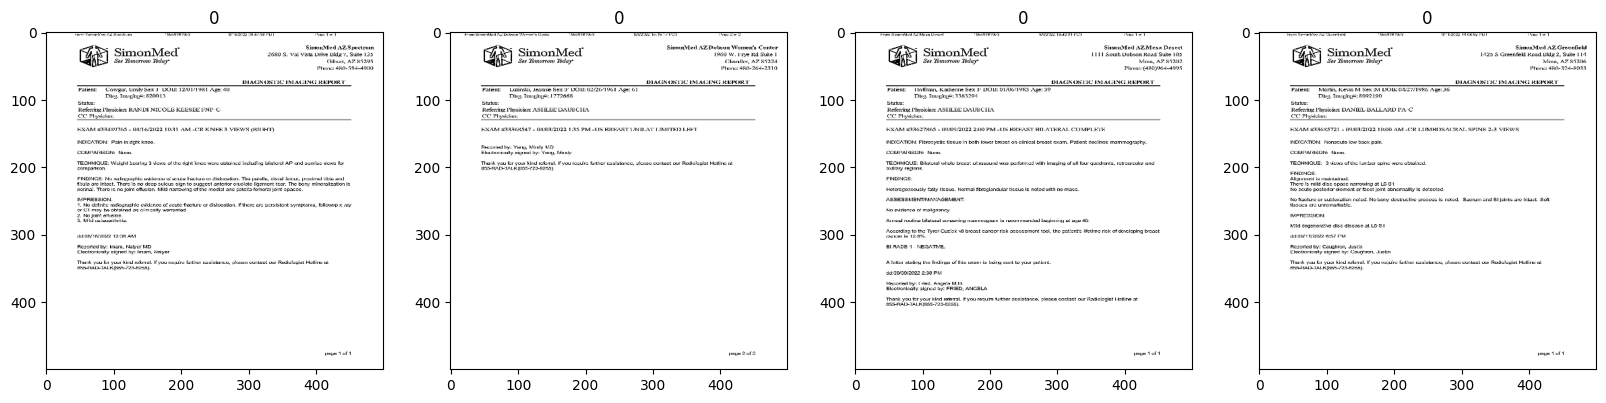

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 200))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img, cmap ='gray')
    ax[idx].title.set_text(batch[1][idx])

split Data

In [21]:
len(data)


5

In [22]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) 
test_size = int(len(data) * 0.1) + 1

In [23]:
val_size

1

In [24]:
test_size+val_size+train_size

5

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)  
test = data.skip(train_size).skip(val_size).take(test_size)

In [26]:
len(test)

1

Deep Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3, 3),1, activation='relu', input_shape=(500, 500, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3),1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 16)      4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 16)       0

Train

In [32]:
logdir = r'C:\Users\zachc\OneDrive - RAHEEL KHAWAJA\Desktop\AMA Automation\Perscripton\logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [34]:
hist  = model.fit(train,epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 7s 106ms/step - loss: 5.8236e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.00

In [35]:
hist.history

{'loss': [5.823552783112973e-05,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

Plot Proformance

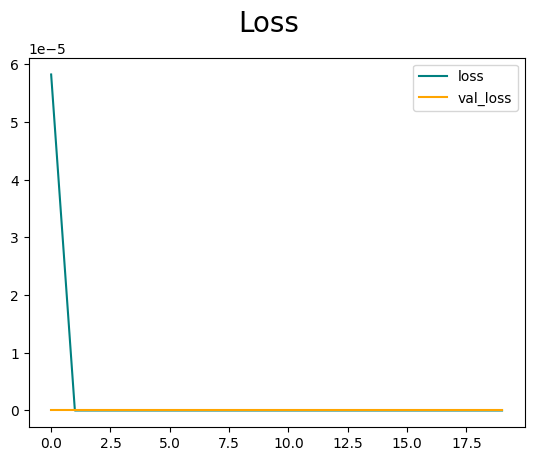

In [36]:

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label ='loss')
plt.plot(hist.history['val_loss'], color='orange', label ='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

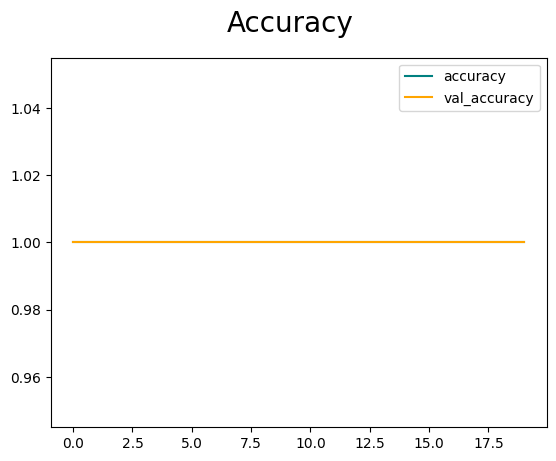

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label ='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label ='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper right')
plt.show()